# Loan Lens

## Data Collection

In [1]:
#Import the Libraries Requires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import missingno as msno


In [2]:
!pip install missingno


In [3]:
#get the data from the file and create a df
loan_eligibility_df= pd.read_csv('C:/Users/user/Desktop/CSAPROJECT/data/loan_data.csv')

In [4]:
loan_eligibility_df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [5]:
print(loan_eligibility_df.shape) 

(614, 13)


In [6]:
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_eligibility_df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [8]:
loan_eligibility_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_eligibility_df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

In [10]:
def explore_object_type(loan_eligibility_df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if loan_eligibility_df[feature_name].dtype ==  'object':
        print(loan_eligibility_df[feature_name].value_counts())

In [11]:
for featureName in loan_eligibility_df.columns:
    if loan_eligibility_df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_eligibility_df, str(featureName))


"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP001003    1
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" Values with count are :
Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: >

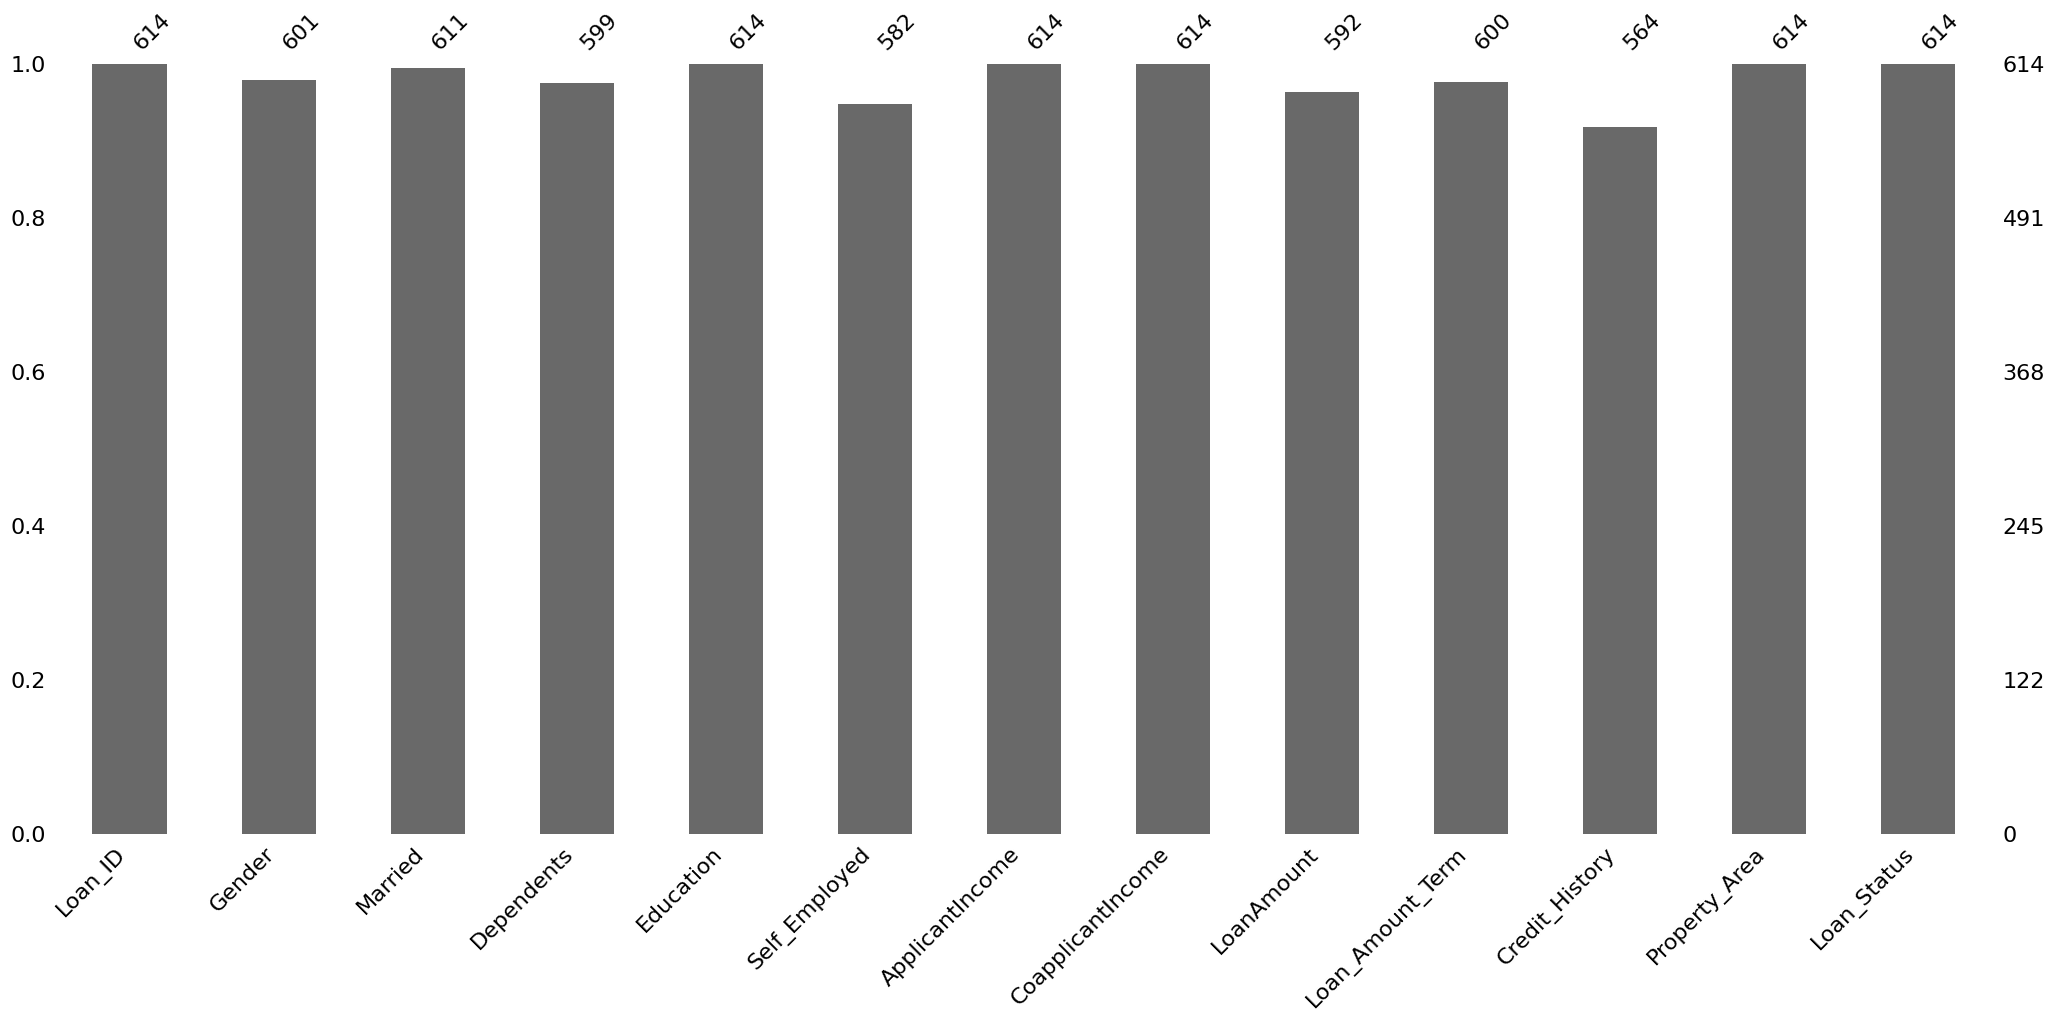

In [12]:
msno.bar(loan_eligibility_df) 

<Axes: >

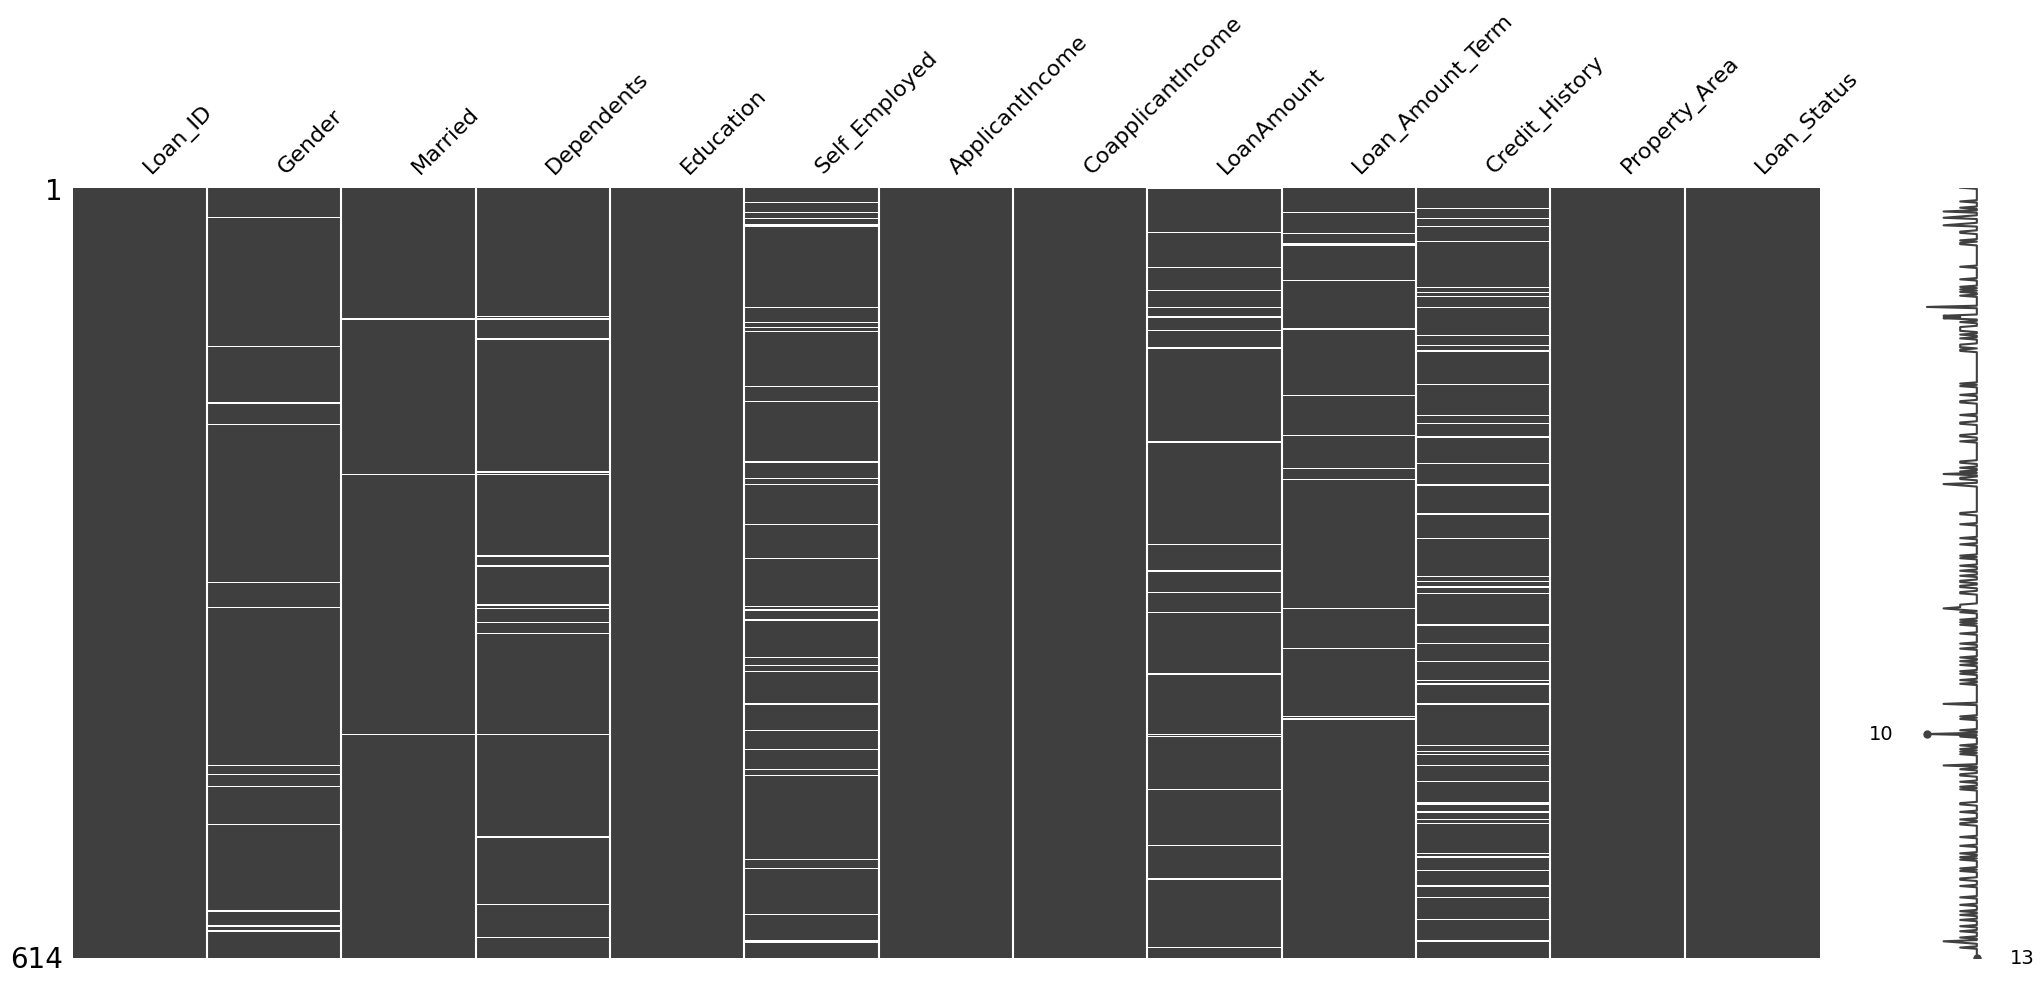

In [13]:
# Show a matrix view of missing data across rows and columns
msno.matrix(loan_eligibility_df )

#### Overall loan approval rate

In [14]:
approval_rate = loan_eligibility_df['Loan_Status'].value_counts(normalize=True) * 100
#With normalize set to True , returns the relative frequency by dividing all values by the sum of values
print(approval_rate)

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


####  How different features relate to loan approval

##### Gender

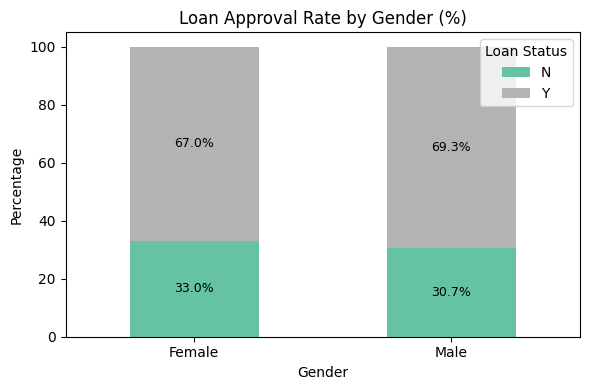

In [15]:
# Create normalized percentage DataFrame
gender_approval = pd.crosstab(loan_eligibility_df['Gender'], loan_eligibility_df['Loan_Status'], normalize='index') * 100

# Plot stacked bar chart
ax = gender_approval.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

plt.title('Loan Approval Rate by Gender (%)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)

# Add percentage labels on bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # only label if bar segment has height
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

##### Credit History

Loan Approval Percentage by Credit History:

Loan_Status         N      Y
Credit_History              
0.0             92.13   7.87
1.0             20.42  79.58


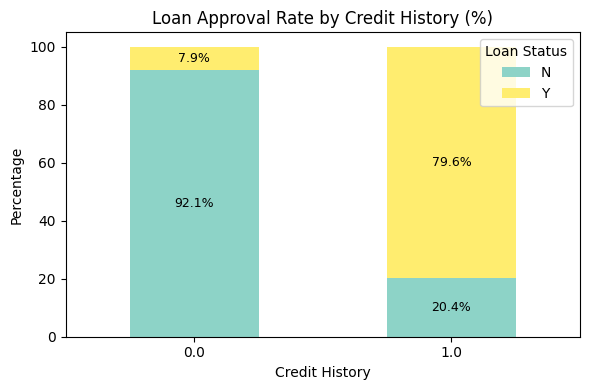

In [16]:
# Crosstab of Credit History vs Loan Status, normalized by Credit History category to get percentages
credit_approval = pd.crosstab(
    loan_eligibility_df['Credit_History'], 
    loan_eligibility_df['Loan_Status'], 
    normalize='index'
) * 100

# Round for display
credit_approval_rounded = credit_approval.round(2)

# Print table
print("Loan Approval Percentage by Credit History:\n")
print(credit_approval_rounded)

# Plot stacked bar chart
ax = credit_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set3')

plt.title('Loan Approval Rate by Credit History (%)')
plt.ylabel('Percentage')
plt.xlabel('Credit History')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)

# Add percentage labels on bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

##### Marital Status

Loan Approval Percentage by Marital Status:

Loan_Status      N      Y
Married                  
No           37.09  62.91
Yes          28.39  71.61


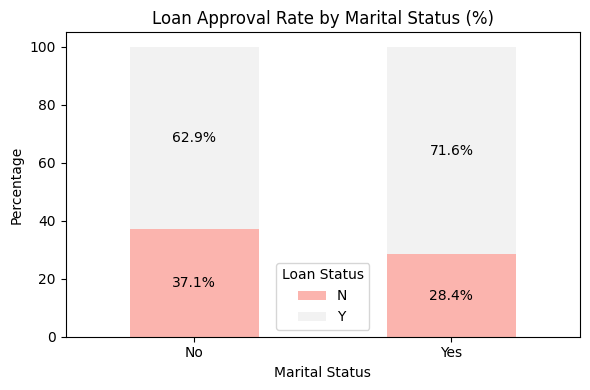

In [17]:
# Crosstab for Marital Status
married_approval = pd.crosstab(
    loan_eligibility_df['Married'], 
    loan_eligibility_df['Loan_Status'], 
    normalize='index'
) * 100

print("Loan Approval Percentage by Marital Status:\n")
print(married_approval.round(2))

# Plot
ax = married_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel1')
plt.title('Loan Approval Rate by Marital Status (%)')
plt.ylabel('Percentage')
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

##### Property area

Loan Approval Percentage by Property Area:

Loan_Status        N      Y
Property_Area              
Rural          38.55  61.45
Semiurban      23.18  76.82
Urban          34.16  65.84


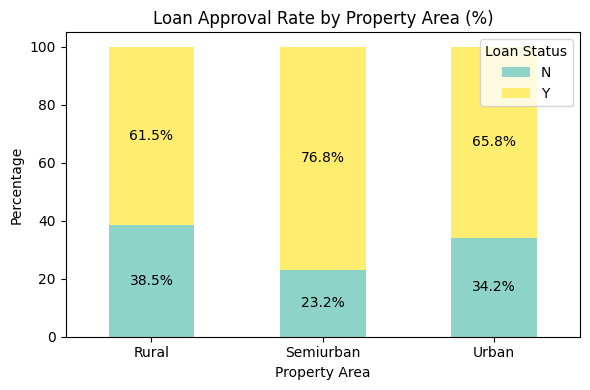

In [18]:
# Crosstab for Property Area
property_approval = pd.crosstab(
    loan_eligibility_df['Property_Area'], 
    loan_eligibility_df['Loan_Status'], 
    normalize='index'
) * 100

print("Loan Approval Percentage by Property Area:\n")
print(property_approval.round(2))

# Plot
ax = property_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set3')
plt.title('Loan Approval Rate by Property Area (%)')
plt.ylabel('Percentage')
plt.xlabel('Property Area')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

##### Graduate

Loan Approval Percentage by Education:

Loan_Status       N      Y
Education                 
Graduate      29.17  70.83
Not Graduate  38.81  61.19


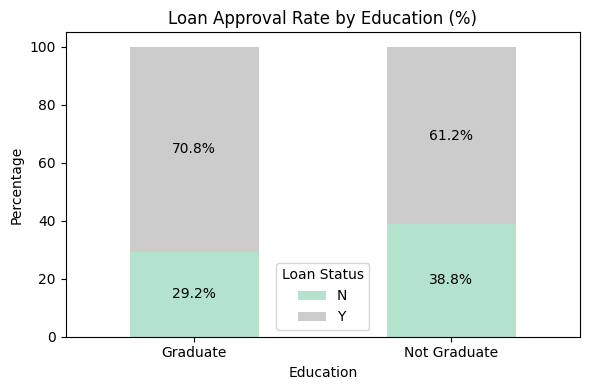

In [19]:
# Crosstab for Education
education_approval = pd.crosstab(
    loan_eligibility_df['Education'], 
    loan_eligibility_df['Loan_Status'], 
    normalize='index'
) * 100

print("Loan Approval Percentage by Education:\n")
print(education_approval.round(2))

# Plot
ax = education_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel2')
plt.title('Loan Approval Rate by Education (%)')
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

#### Ioan durations (in months) most frequently selected by applicants.

In [20]:
# Show the value counts for each unique loan term
loan_term_counts = loan_eligibility_df['Loan_Amount_Term'].value_counts().sort_values(ascending=False)

# Print the results
print("Most Common Loan Amount Terms (in months):")
print(loan_term_counts)

Most Common Loan Amount Terms (in months):
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


####  Income and loan amount trends among approved and unapproved applicants

In [21]:
# Filter approved and rejected applicants based on raw labels
approved = loan_eligibility_df[loan_eligibility_df['Loan_Status'] == 'Y']
rejected = loan_eligibility_df[loan_eligibility_df['Loan_Status'] == 'N']

# Approved averages
print("Approved Applicants:")
print("Average Applicant Income:", approved['ApplicantIncome'].mean())
print("Average Coapplicant Income:", approved['CoapplicantIncome'].mean())
print("Average Loan Amount:", approved['LoanAmount'].mean())

# Rejected averages
print("\nRejected Applicants:")
print("Average Applicant Income:", rejected['ApplicantIncome'].mean())
print("Average Coapplicant Income:", rejected['CoapplicantIncome'].mean())
print("Average Loan Amount:", rejected['LoanAmount'].mean())

Approved Applicants:
Average Applicant Income: 5384.068720379147
Average Coapplicant Income: 1504.516398077346
Average Loan Amount: 144.29440389294405

Rejected Applicants:
Average Applicant Income: 5446.078125
Average Coapplicant Income: 1877.8072916666667
Average Loan Amount: 151.22099447513813


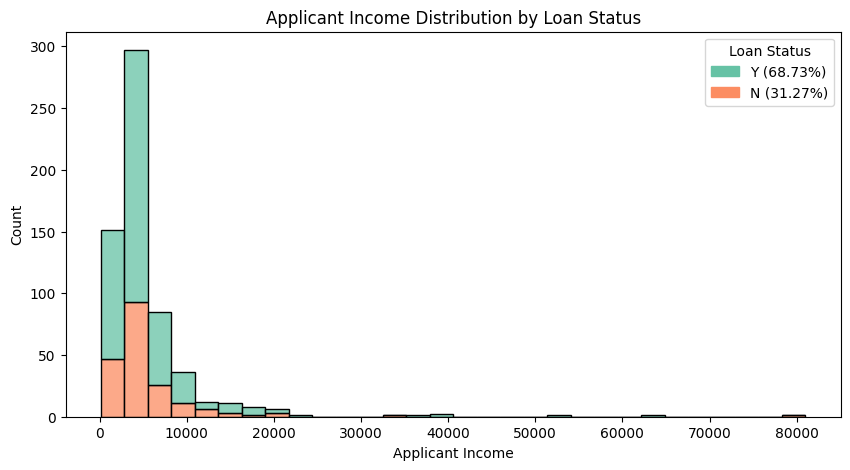

In [22]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,5))

sns.histplot(
    data=loan_eligibility_df,
    x='ApplicantIncome',
    hue='Loan_Status',
    multiple='stack',
    bins=30,
    palette='Set2',
    legend=False  # disable automatic legend to create our own
)

plt.title('Applicant Income Distribution by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

# Calculate percentages
total = len(loan_eligibility_df)
counts = loan_eligibility_df['Loan_Status'].value_counts()
percentages = (counts / total * 100).round(2)

# Manually create legend handles with percentages
unique_statuses = counts.index.tolist()
colors = sns.color_palette('Set2', n_colors=len(unique_statuses))

handles = []
labels = []

for status, color in zip(unique_statuses, colors):
    handles.append(mpatches.Patch(color=color))
    labels.append(f"{status} ({percentages[status]}%)")

plt.legend(handles=handles, labels=labels, title='Loan Status')

plt.show()

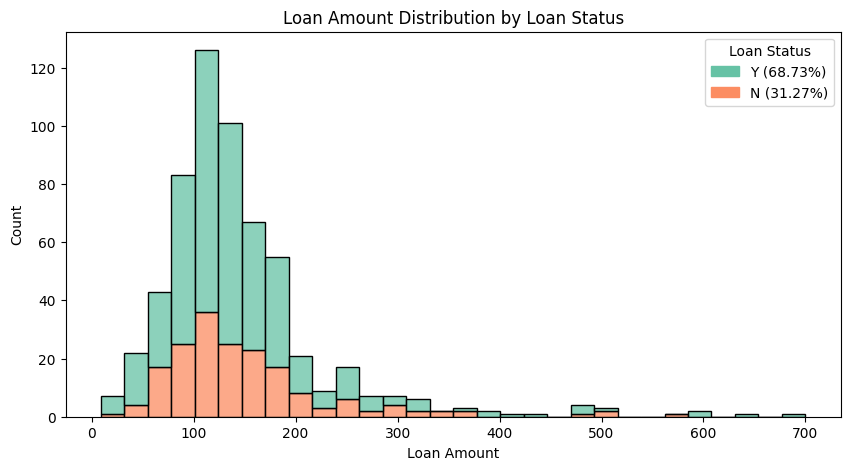

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(
    data=loan_eligibility_df,
    x='LoanAmount',
    hue='Loan_Status',
    multiple='stack',
    bins=30,
    palette='Set2',
    legend=False  # We'll create a custom legend
)

plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

# Calculate percentages of each Loan_Status category
total = len(loan_eligibility_df)
counts = loan_eligibility_df['Loan_Status'].value_counts()
percentages = (counts / total * 100).round(2)

# Manually create legend handles with percentages
unique_statuses = counts.index.tolist()
colors = sns.color_palette('Set2', n_colors=len(unique_statuses))

handles = []
labels = []

for status, color in zip(unique_statuses, colors):
    handles.append(mpatches.Patch(color=color))
    labels.append(f"{status} ({percentages[status]}%)")

plt.legend(handles=handles, labels=labels, title='Loan Status')

plt.show()


## Visualization

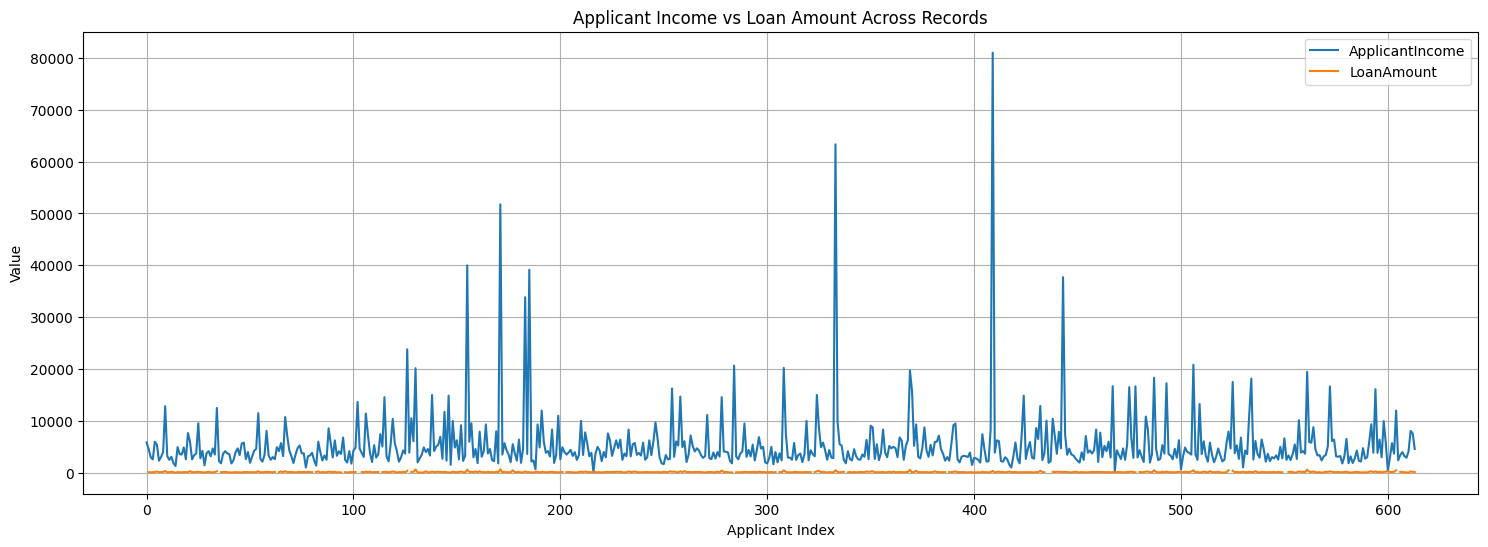

In [24]:
loan_eligibility_df[['ApplicantIncome', 'LoanAmount']].plot(figsize=(18, 6))
plt.title("Applicant Income vs Loan Amount Across Records")
plt.xlabel("Applicant Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

### Distribution plots

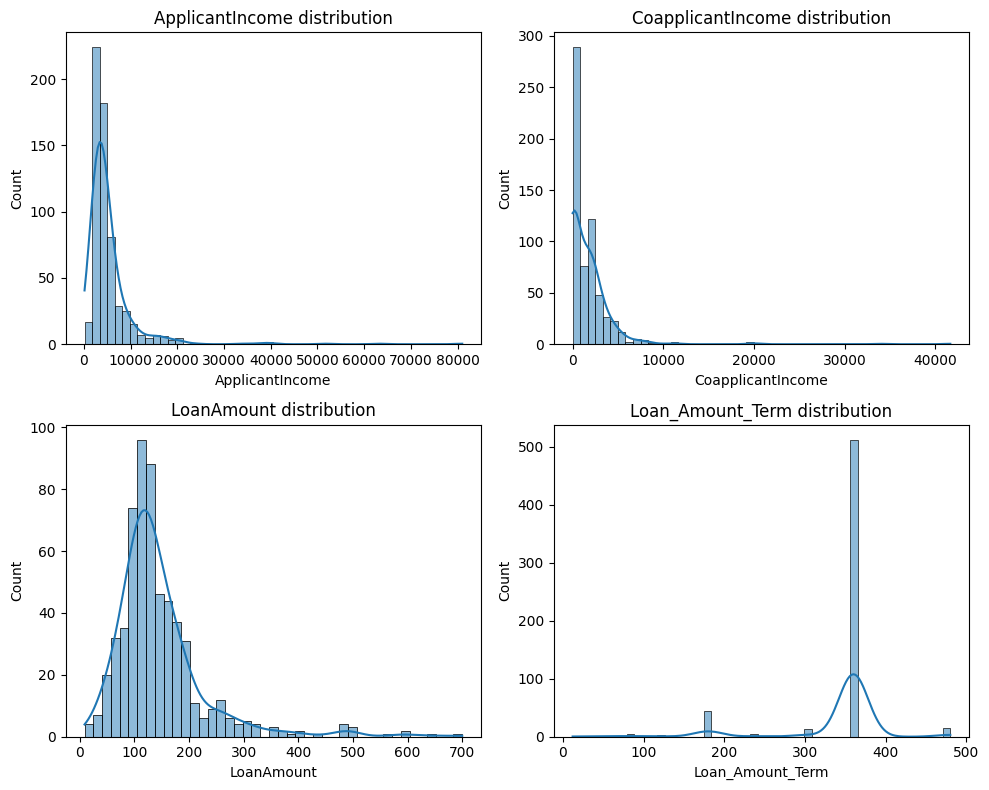

In [25]:
#Numerical 
#ApplicantIncome
fig, axes= plt.subplots(2,2,figsize=(10,8)) 
#ApplicantIncome
sns.histplot(loan_eligibility_df["ApplicantIncome"], kde=True, ax= axes[0,0])
axes[0,0].set_title("ApplicantIncome distribution")

#CoapplicantIncome
sns.histplot(loan_eligibility_df["CoapplicantIncome"], kde=True, ax= axes[0,1])
axes[0,1].set_title("CoapplicantIncome distribution")

#LoanAmount
sns.histplot(loan_eligibility_df["LoanAmount"], kde=True, ax= axes[1,0])
axes[1,0].set_title("LoanAmount distribution")

#Loan_Amount_Term
sns.histplot(loan_eligibility_df["Loan_Amount_Term"], kde=True, ax= axes[1,1])
axes[1,1].set_title("Loan_Amount_Term distribution")

plt.tight_layout()
plt.show()


### Heatmap of correlation

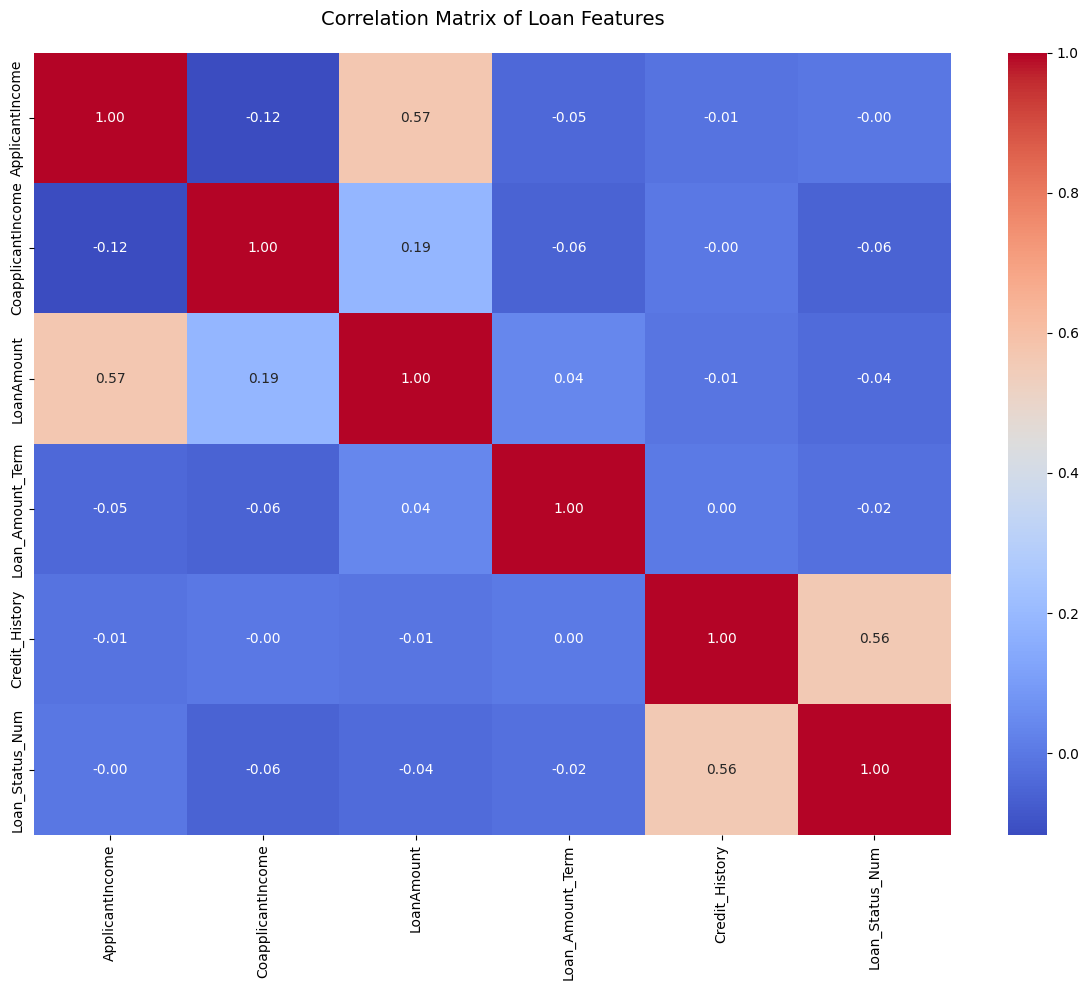

In [26]:
# 1. First ensure we have a clean copy of the data
df = loan_eligibility_df.copy()

# 2. Convert Loan_Status to numeric (Y=1, N=0)
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})#Temporarily convert the data into numerical

# 3. Select only numerical features (including our new encoded target)
num_vars = df.select_dtypes(include=['int64','float64'])

# 4. Calculate correlation matrix
corr_matrix = num_vars.corr()

# 5. Plot the correlation matrix
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
heatmap = sns.heatmap(corr_matrix, 
                     annot=True, 
                     fmt=".2f", 
                     cmap="coolwarm",
                     # center=0,
                     # vmin=-1,
                     # vmax=1,
                     # annot_kws={'size': 9}
                     )
plt.title("Correlation Matrix of Loan Features", pad=20, fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Data Cleaning and PreProcessing

In [27]:
#Drop irrelevant column
# axis=0 → Operates vertically (i.e., by rows)
# axis=1 → Operates horizontally (i.e., by columns)
loan_eligibility_df.drop("Loan_ID", axis=1, inplace=True)

loan_eligibility_df.info()#check to see if LoanID is dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Impute null values

 #### Check for outliers and inconsistencies
 

##### Checking for inconcistencies/data out of the ordinary

In [28]:
loan_eligibility_df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [29]:
# loan_eligibility_df["Credit_History"] = loan_eligibility_df["Credit_History"].astype(str)

In [30]:
loan_eligibility_df["Credit_History"].unique()

array([ 1.,  0., nan])

In [31]:
loan_eligibility_df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [32]:
loan_eligibility_df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

##### checking for outliers Outliers in order to know the best method for imputation

In [33]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected.")
    return outliers

# List of numerical columns to check
cols_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Loop through each and detect outliers
for col in cols_to_check:
    detect_outliers(loan_eligibility_df, col)



ApplicantIncome: 50 outliers detected.
CoapplicantIncome: 18 outliers detected.
LoanAmount: 39 outliers detected.
Loan_Amount_Term: 88 outliers detected.


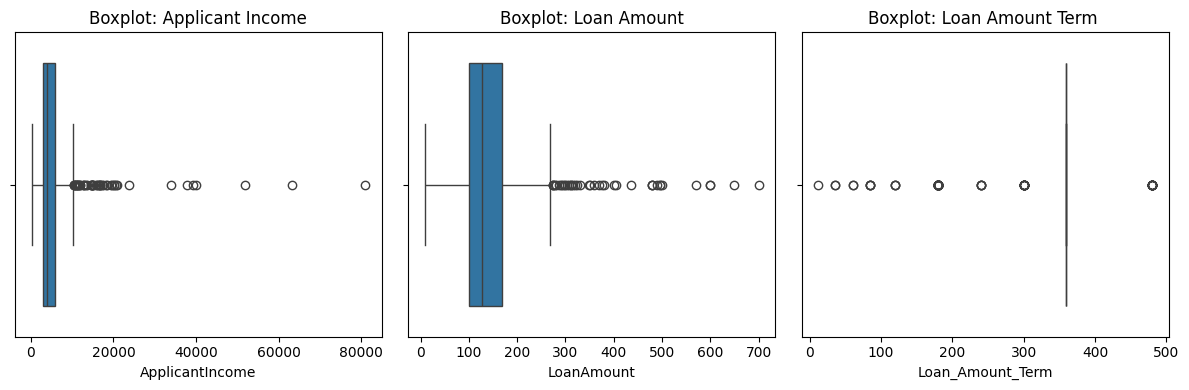

In [34]:
fig, axes= plt.subplots(1,3,figsize=(12,4))

#ApplicantIncome
sns.boxplot(x=loan_eligibility_df['ApplicantIncome'],ax=axes[0])
axes[0].set_title("Boxplot: Applicant Income")


#Loan_Amount_Term
sns.boxplot(x=loan_eligibility_df['LoanAmount'],ax=axes[1])
axes[1].set_title("Boxplot: Loan Amount")


#Loan_Amount_Term
sns.boxplot(x=loan_eligibility_df['Loan_Amount_Term'],ax=axes[2])
axes[2].set_title("Boxplot: Loan Amount Term ")

plt.tight_layout()
plt.show()





In [35]:
#fill most categorical columns fill with mode
loan_eligibility_df['Gender']=loan_eligibility_df['Gender'].fillna(loan_eligibility_df['Gender'].mode())
loan_eligibility_df['Married']=loan_eligibility_df['Married'].fillna(loan_eligibility_df['Married'].mode())

In [36]:
# Replace '3+' with 3 and convert to numeric
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].replace('3+', 3).astype(float)
# Use the median to fill missing values in the Dependents column because it provides a stable 
# imputation method for this discrete numeric feature.Avoided using the mode because it would have 
# replaced the missing values with 0, assuming applicants had no dependents, which introduces false certainty 
# and could bias the model,especially if they actually had dependents.Avoided using the mean because 
# Dependents is a count-based feature, and the mean could produce unrealistic float values like 1.43, which are 
# not valid since one cannot have a fraction of a dependent. Using floats here would misrepresent the data unless 
# rounded, which adds unnecessary distortion. Since the missing values are minimal (about 2%), using 'Unknown' 
# was not appropriate, as it would unnecessarily introduce a new category and reduce the clarity of the feature. 
# The median is the best choice it reflects the typical number of dependents without being skewed by rare high 
# values, making the imputation both representative and robust
loan_eligibility_df['Dependents']=loan_eligibility_df['Dependents'].fillna(loan_eligibility_df['Dependents'].median())
#Fill Self_Employed with mode
loan_eligibility_df['Self_Employed']=loan_eligibility_df['Self_Employed'].fillna(loan_eligibility_df['Self_Employed'].mode())

In [37]:
#check data in dependents if 3+was replaced
loan_eligibility_df['Dependents'].unique()

array([0., 1., 2., 3.])

In [38]:
# Use the median to fill the missing values because, as shown in the box plot,
# the data contains many outliers (39). The mean would be skewed by these extreme values,
# while the median provides a more robust and accurate measure of central tendency in this case.
loan_eligibility_df['LoanAmount']=loan_eligibility_df['LoanAmount'].fillna(loan_eligibility_df['LoanAmount'].median())
loan_eligibility_df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
#use the mode to fill missing values in Loan_Amount_Term because it is a categorical numeric feature 
#using it maintains consistency with typical loan durations.
# Mean or median are not appropriate here since they may produce non-standard term values 
loan_eligibility_df['Loan_Amount_Term'] = loan_eligibility_df['Loan_Amount_Term'].fillna(loan_eligibility_df['Loan_Amount_Term'].mode()[0])
loan_eligibility_df['Loan_Amount_Term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Loan_Amount_Term
Non-Null Count  Dtype  
--------------  -----  
614 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [40]:
## I filled missing values in Credit_History with 'Unknown' because the nulls might indicate 
# applicants who have never taken a loan before or lack a credit record in the system.
loan_eligibility_df['Credit_History']=loan_eligibility_df['Credit_History'].fillna('Unknown')
loan_eligibility_df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
loan_eligibility_df

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No         0.0      Graduate            No             5849   
1      Male     Yes         1.0      Graduate            No             4583   
2      Male     Yes         0.0      Graduate           Yes             3000   
3      Male     Yes         0.0  Not Graduate            No             2583   
4      Male      No         0.0      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
609  Female      No         0.0      Graduate            No             2900   
610    Male     Yes         3.0      Graduate            No             4106   
611    Male     Yes         1.0      Graduate            No             8072   
612    Male     Yes         2.0      Graduate            No             7583   
613  Female      No         0.0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
0                  0.0       128.0             360.0            1.0   
1               1508.0       128.0             360.0            1.0   
2                  0.0        66.0             360.0            1.0   
3               2358.0       120.0             360.0            1.0   
4                  0.0       141.0             360.0            1.0   
..                 ...         ...               ...            ...   
609                0.0        71.0             360.0            1.0   
610                0.0        40.0             180.0            1.0   
611              240.0       253.0             360.0            1.0   
612                0.0       187.0             360.0            1.0   
613                0.0       133.0             360.0            0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

#### log transformation to handle outliers and skewness

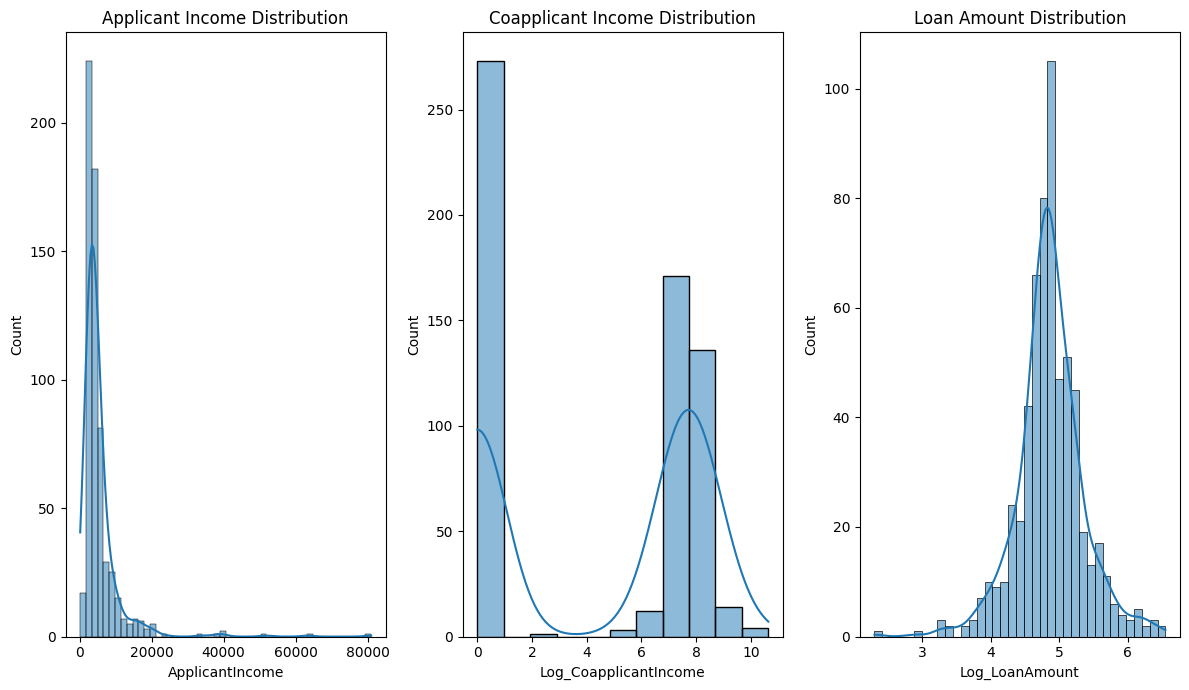

Log_ApplicantIncome      0.482128
Log_CoapplicantIncome   -0.173073
Log_LoanAmount          -0.151578
dtype: float64

In [42]:
'''> 1         Highly right-skewed (long tail on the right) 
0.5 to 1       Moderately right-skewed                          
-0.5 to 0.5    Approximately symmetric (normal)                 
< -1           Highly **left-skewed** (long tail on the left)   '''

loan_eligibility_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].skew()


# Apply log1p transformation
#This compresses large values and stretches small ones, making the distribution more symmetrical.
loan_eligibility_df['Log_ApplicantIncome'] = np.log1p(loan_eligibility_df['ApplicantIncome'])
loan_eligibility_df['Log_CoapplicantIncome'] = np.log1p(loan_eligibility_df['CoapplicantIncome'])
loan_eligibility_df['Log_LoanAmount'] = np.log1p(loan_eligibility_df['LoanAmount'])
#loan_eligibility_df['Loan_Amount_Term'] = np.log1p(loan_eligibility_df['Loan_Amount_Term'])
#Loan_Amount_Term has many repeated values (like a bunch of 360s), the transformation may not work well.
#The distribution might be too discrete or uniform, so standard transforms don’t help.


# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 7))

# Plot 1: ApplicantIncome
sns.histplot(loan_eligibility_df["ApplicantIncome"], kde=True,  ax=axes[0])
axes[0].set_title('Applicant Income Distribution')

# Plot 2: CoapplicantIncome
sns.histplot(loan_eligibility_df["Log_CoapplicantIncome"], kde=True,  ax=axes[1])
axes[1].set_title('Coapplicant Income Distribution')

# Plot 3: LoanAmount
sns.histplot(loan_eligibility_df["Log_LoanAmount"], kde=True,  ax=axes[2])
axes[2].set_title('Loan Amount Distribution')


plt.tight_layout()
plt.show()


#check whether skewness was fixed
loan_eligibility_df[['Log_ApplicantIncome', 'Log_CoapplicantIncome', 'Log_LoanAmount']].skew()

#### Encode

 

In [43]:
# 1. Binary encode Education (cleaner than LabelEncoder approach)
# Since Label Encoder by default assigns labels alphabetically (e.g., 'Graduate' = 0 and 'Not Graduate' = 1) we first map the values to (e.g., 'B_Graduate' = 0 and 'A_Not Graduate')
loan_eligibility_df['Education'] = loan_eligibility_df['Education'].map({
    'Graduate': 'B_Graduate',
    'Not Graduate': 'A_Not Graduate'
})
lbl_encoder = LabelEncoder()
loan_eligibility_df['Education'] = lbl_encoder.fit_transform(loan_eligibility_df['Education'])

# Applying one-hot encoding to nominal categorical columns so the model can interpret them numerically
loan_eligibility_df= pd.get_dummies(loan_eligibility_df, columns=[   #automatically creates new binary (0/1) columns for each category.
    'Gender', 
    'Married', 
    'Self_Employed', 
    'Property_Area', 
    'Credit_History',
    'Loan_Status',
 ],
    dtype=(int)); # drops the first category of each column to avoid dummy variable trap

In [44]:
loan_eligibility_df.info()#check if encoding worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   Education                614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Log_ApplicantIncome      614 non-null    float64
 7   Log_CoapplicantIncome    614 non-null    float64
 8   Log_LoanAmount           614 non-null    float64
 9   Gender_Female            614 non-null    int64  
 10  Gender_Male              614 non-null    int64  
 11  Married_No               614 non-null    int64  
 12  Married_Yes              614 non-null    int64  
 13  Self_Employed_No         614 non-null    int64  
 14  Self_Employed_Yes        6

### Feature Selection and Correlation 


#### Heatmap of correlations

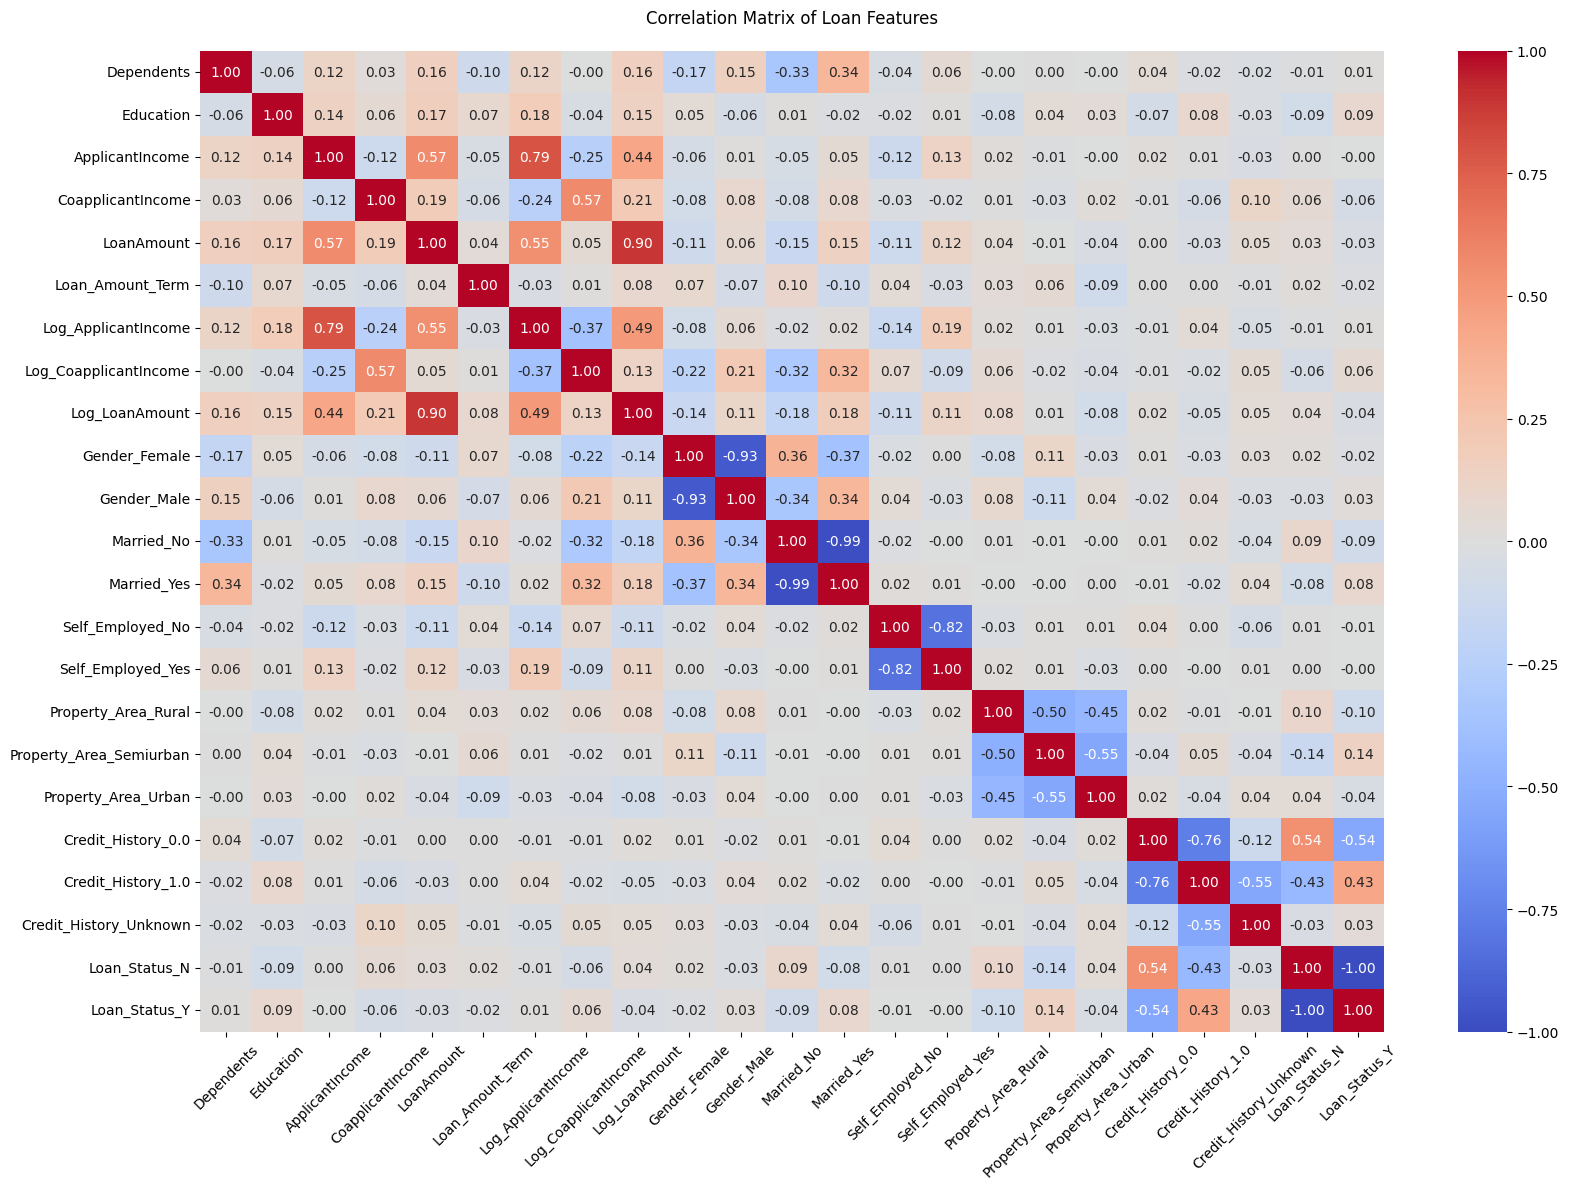

In [45]:
# Select numerical variables (including encoded categoricals)
num_vars =  loan_eligibility_df.select_dtypes(include=['int','float']) #which is basically all columns

# Create correlation matrix with Loan_Status (assuming it's encoded as 0/1)
corr_matrix = num_vars.corr()

# # Plot heatmap
plt.figure(figsize=(17,12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            center=0,)
plt.title("Correlation Matrix of Loan Features", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
# Check how strongly each feature is correlated with loan approval status
target_corr = corr_matrix["Loan_Status_Y"].sort_values(ascending=False)
print(target_corr)

Loan_Status_Y              1.000000
Credit_History_1.0         0.432616
Property_Area_Semiurban    0.136540
Education                  0.085884
Married_Yes                0.084281
Log_CoapplicantIncome      0.060593
Credit_History_Unknown     0.033849
Gender_Male                0.025407
Log_ApplicantIncome        0.010959
Dependents                 0.010118
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Self_Employed_No          -0.005857
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
LoanAmount                -0.033214
Log_LoanAmount            -0.038242
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Married_No                -0.091478
Property_Area_Rural       -0.100694
Credit_History_0.0        -0.540556
Loan_Status_N             -1.000000
Name: Loan_Status_Y, dtype: float64


## Model Building

In [47]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# We'll use Loan_Status_Y as our target (1 for approved, 0 for not approved)
X = loan_eligibility_df.drop(['Loan_Status_Y', 'Loan_Status_N'], axis=1)
y = loan_eligibility_df['Loan_Status_Y']

# Split data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (491, 21)
Test set size: (123, 21)


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

Accuracy: 0.8618

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion Matrix:
[[22 16]
 [ 1 84]]


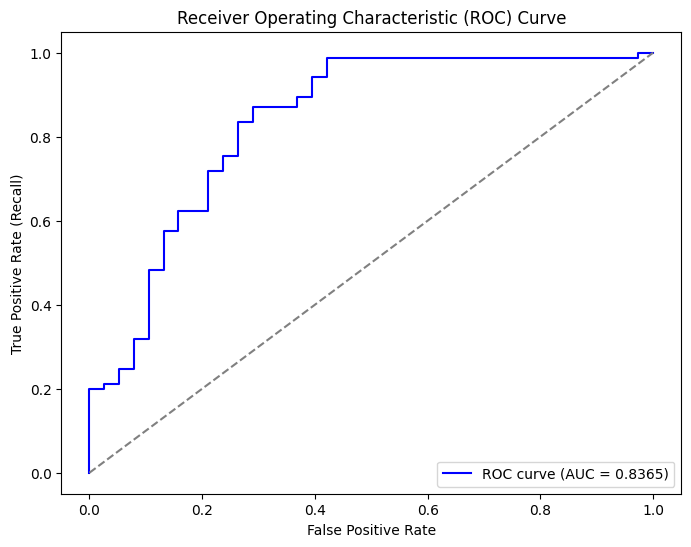

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Create a pipeline with scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: scale features
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))  # Step 2: logistic regression
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # probability for positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()


### Decision Tree Model 

Decision Tree Performance:
Accuracy: 0.7480
              precision    recall  f1-score   support

           0       0.58      0.68      0.63        38
           1       0.85      0.78      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.73      0.72       123
weighted avg       0.76      0.75      0.75       123

Confusion Matrix:
[[26 12]
 [19 66]]


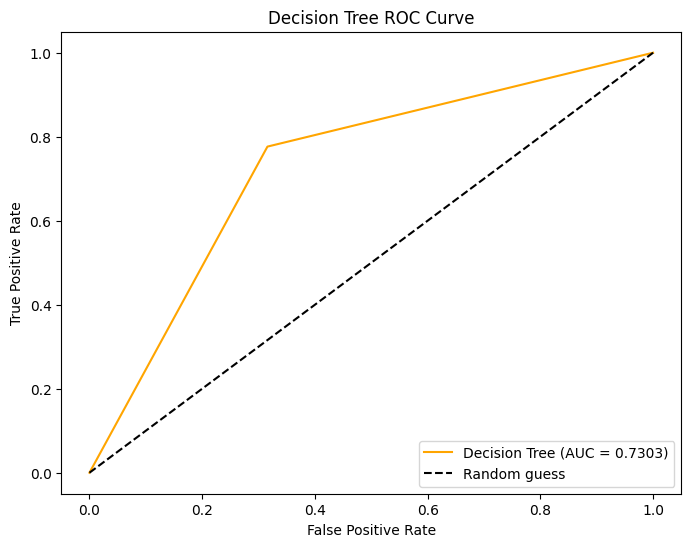

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Random Forest

Random Forest Performance:
Accuracy: 0.8374
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123

Confusion Matrix:
[[24 14]
 [ 6 79]]


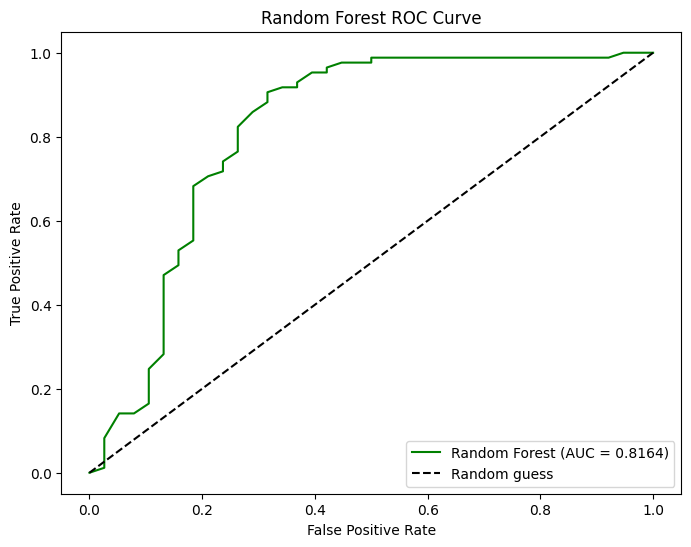

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Train Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Deployment

In [54]:
import pickle

# After your training and pipeline fitting:
# pipeline.fit(X_train, y_train)

# Save the model pipeline
with open('logistic_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Save the training feature columns (important to keep order!)
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

print("Model and feature columns saved!")

Model and feature columns saved!


In [55]:
import pickle
import pandas as pd

# 1. Load your saved pipeline model
with open('logistic_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 2. Load the saved feature columns (order matters!)
with open('model_columns.pkl', 'rb') as f:
    model_columns = pickle.load(f)

# 3. Prepare input data dictionary (with your actual log values)
input_dict = {
    'Dependents': 0,
    'Education': 1,
    'ApplicantIncome': 4500,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 128.0,
    'Loan_Amount_Term': 360.0,
    'ApplicantIncome_log': 8.41,     # your precomputed log
    'LoanAmount_log': 4.85,          # your precomputed log
    'CoapplicantIncome_log': 0.0,    # your precomputed log
    'Gender_Female': 0,
    'Gender_Male': 1,
    'Married_No': 0,
    'Married_Yes': 1,
    'Self_Employed_No': 1,
    'Self_Employed_Yes': 0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 1,
    'Credit_History_0.0': 0,
    'Credit_History_1.0': 1,
    'Credit_History_Unknown': 0
}
# 4. Fill any missing features with 0 to avoid NaNs
input_dict_complete = {col: input_dict.get(col, 0) for col in model_columns}

# 5. Convert to DataFrame with correct column order
X_new = pd.DataFrame([input_dict_complete], columns=model_columns)

# 6. Make prediction
prediction = loaded_model.predict(X_new)[0]
probability = loaded_model.predict_proba(X_new)[0][1]

# 7. Output result
print("Prediction (1 = approved, 0 = not approved):", prediction)
print(f"Probability of loan approval: {probability:.2%}")

Prediction (1 = approved, 0 = not approved): 1
Probability of loan approval: 92.44%
